train_size 816
816
(816, 384) (816, 6)
data shape (1633, 6) (1634, 384)
data_size 1633 1634


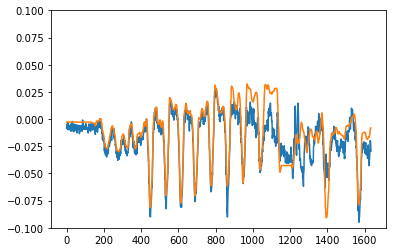

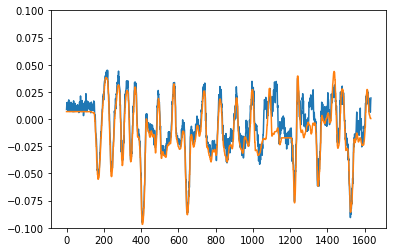

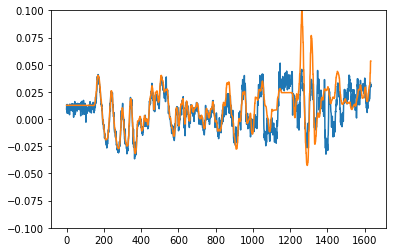

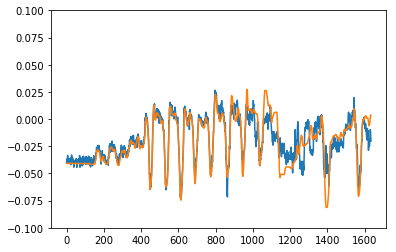

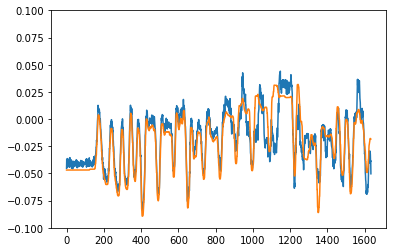

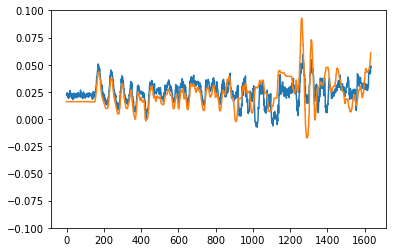

In [74]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

#data = np.load('cloth2/controller/data.npz')
def load_model_name(data_name):
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']
    return load_model_data(pos,feat)
    
    
def load_model_data(pos, feat):
    inds = np.random.choice(a=len(feat),size=2*len(feat))
    if len(inds)%2 == 1:
        inds=inds[:-1]
    nd = len(inds)/2 # number of deltas
    X_train = feat[inds[:nd]] - feat[inds[nd:]]
    y_train = pos[inds[:nd]] - pos[inds[nd:]]
    X_train, y_train = same_size(X_train, y_train)
    print X_train.shape, y_train.shape

    # begin training
    from sklearn import linear_model
    model = linear_model.Lasso(alpha = 0.01)
    model.fit(X_train, y_train)
    return model


data_name = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/data2.npz'

def combine_feature():
    data_name1 = '/home/rmqlife/work/deformable/cloth/data2_grid_background.npz'
    data_name2 = '/home/rmqlife/work/deformable/cloth/data2_depth_grid.npz'

    data1 = np.load(data_name1)
    pos = data1['data']
    feat = data1['feat']
    
    data2 = np.load(data_name2)
    feat2 = data2['feat']
    print feat1.shape,feat2.shape
    print feat1[0]
    
    print feat2[0]
    feat = np.hstack((feat1,feat2))
    return feat, pos


data = np.load(data_name)
pos = data['pos']
feat = data['feat']

prop = 0.5
train_size = int(len(pos)*prop)
print "train_size", train_size

model = load_model_data(pos[:train_size], feat[:train_size])
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
target = 429  # target index  
X = feat - feat[target]
y = pos - pos[target]
y_pred = model.predict(X)



print "data_size", len(y), len(y_pred)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.1,0.1])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

195


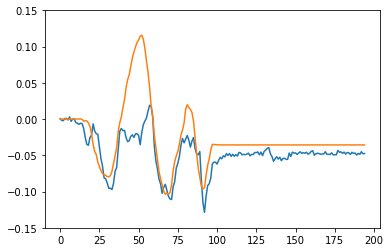

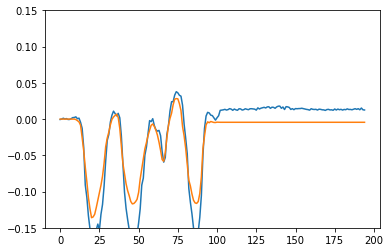

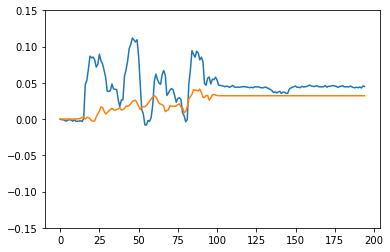

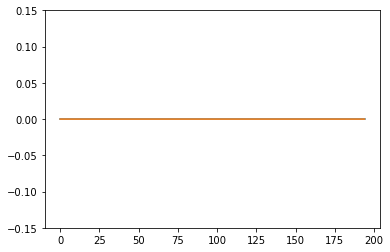

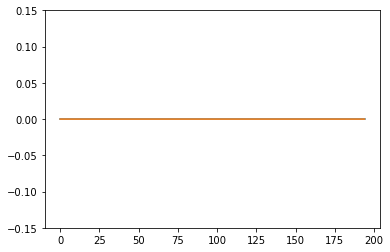

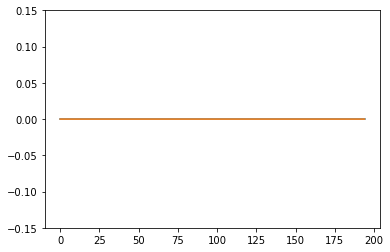

In [16]:
# Another dataset to fit
data = np.load('/home/rmqlife/work/cloth_hri/scripts/data_0815-1740.npz')
data = np.load('/home/rmqlife/work/cloth_hri/scripts/data_0815-2050.npz')
feat = data['feat']
pos = data['pos']
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat[:] - feat[target]
y = pos[:] - pos[target]

X,y = same_size(X,y)

#compute the gradient of the feature vector
y_pred = model.predict(X)



#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(len(y)),y[:,i])
    plt.show()